In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from scipy.stats import zscore
import random
from pprint import pprint

In [32]:
df=pd.read_csv("diabetes.csv")  ## by using pandas library the data is being loaded
df

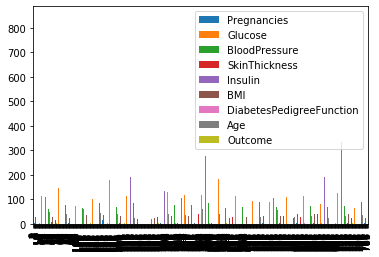

In [33]:
df.plot(kind='bar')  ## Plotting the raw data as a bar chart
plt.show()

In [34]:
new_df=df.iloc[:,:-1]           ## I extracted all features in new dataframe named new_df except target variable. 
                                ## OR I can say that I dropped target varirable in order to apply data standardization. 

new_df=new_df.apply(zscore)     ## Here, I have applied z-score normilzation on new dataframe i.e new_df.  

df.iloc[:,:-1]=new_df           ## Here, I assigned all values to actual data frame after data standardization
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


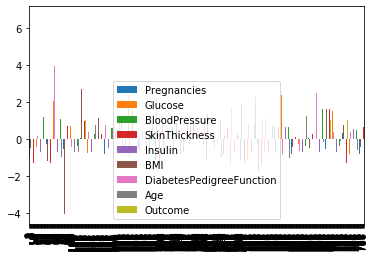

In [35]:
df.plot(kind='bar') # I have done data standardization and then plotting the parepared data as a bar chart
plt.show()

In [18]:
def train_test_split(df, test_size):   # I use this block when I evaluated model by Multiple Random Sampling method
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

random.seed(0) 
train_df, test_df = train_test_split(df, test_size=0.5) # I partitioned training and testing set by using train_test_split function

In [13]:
"""train_df=df.iloc[0:614,:]  # I partitioned training and testing set here.
                              # I use this block when I evaluated model by K-Fold cross validation
test_df=df.iloc[614:,:] """

In [19]:
newList1=train_df.iloc[:,:-1].values
target1=train_df.iloc[:,-1].values
totalTest=len(test_df)

newList2=test_df.iloc[:,:-1].values
target2=test_df.iloc[:,-1].values

In [23]:
clf=svm.SVC()       # By using sklearn python library, here I register model as clf.
clf.fit(newList1,target1) # Here newList1 is training features and target1 is training target variable. 
pprint(clf)  # Display the credential of SVM MODEL


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [24]:
result=[]
for i in range(0,totalTest):
    t=clf.predict([newList2[i]])
    result.append(t[0])
count=0

for i in range(0,totalTest):
    if result[i]==target2[i]:
       count+=1

count/totalTest    # This accuracy is calculate here


0.7760416666666666